Areej Alotaibi
Raghad Alshabana
Salema Bnous
Shoroog Alarifi

- Why we choose this code?

Firstly, the code selection process was not random, the code genuinely matched our problem and it was easy for us to understand despite the fact that we made changes to meet the criteria like converting the continuous features to discrete. 

However, we considered factors like decision making when constructing a decision tree model which are Gini and Entropy. 
We applied for the comparison already and our decision was to look up a code that uses Gini since it outperforms the entropy in continuous features and also the high accuracy it has. 

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
#Reading imported file in the Notebook
#Showing the first 5 col.
df = pd.read_csv('heart(1).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Convert the continous featurs to Discrete:

we use pandas cut to separate the data elements into different bins with specefic range depends on features type and which numbers are allowed to use .

In [50]:
df=pd.DataFrame(df)

print('\nBefore convert it : \n')
print(df)

df.age=pd.cut(df.age, bins=[0,20,40,60,80,100],labels=False, right=False)
#Age have min=29 and max=77 ,the intervals with new values: [0,20]=0,[21,40]=1,[41,60]=2,[61,80]=3,[81,100]=4

df.trestbps=pd.cut(df.trestbps, bins=[0,119,129,400] ,labels=False, right=False)
#Trestbps have min=94 and max=200 ,the intervals with new values: [0,119]=0 'Normal',[120,129]=1 'elevated',[130,400]='high'

df.chol=pd.cut(df.chol, bins=[100,199,239,700] ,labels=False, right=False)
#chol have min=126 and max=564 , so the intervals with new values: [100,199]=0'ideal ,[200,239]=1'borderline' ,[240,700]=2'too high or low'

df.thalach=pd.cut(df.thalach, bins=[50,117,137,156,176,210] ,labels=False, right=False)
#thalach have min=71 and max=202 , so the intervals with new values: [50,117]=0'very light' ,[118,137]=1'light' ,[138,156]=2'moderate' , [157,176]=3'hard' ,[177,210]=4'maximum

df.oldpeak=pd.cut(df.oldpeak, bins=[0,2,4.1,7] ,labels=False, right=False)
#oldpeak have min=0 and max=6.2 , so the intervals with new values: [0,2]=0 'low' ,[2.1,4.1]=1'risk' ,[4.2,7]=2'terrible'


print('\n After convert it : \n')
print(df)


Before convert it : 

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slope     303 non-null    int64
 11  ca        303 non-null    int64
 12  thal      303 non-null    int64
 13  target    303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB


In [52]:
X = df.drop(columns=['target'])
y = df['target']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


Splitting dataset to train and test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y) 
print(X_train.shape)
print(X_test.shape)

(227, 13)
(76, 13)


we will fit a normal decision tree without any fine tuning and check the results

In [54]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train) 
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Visualizing decision tree

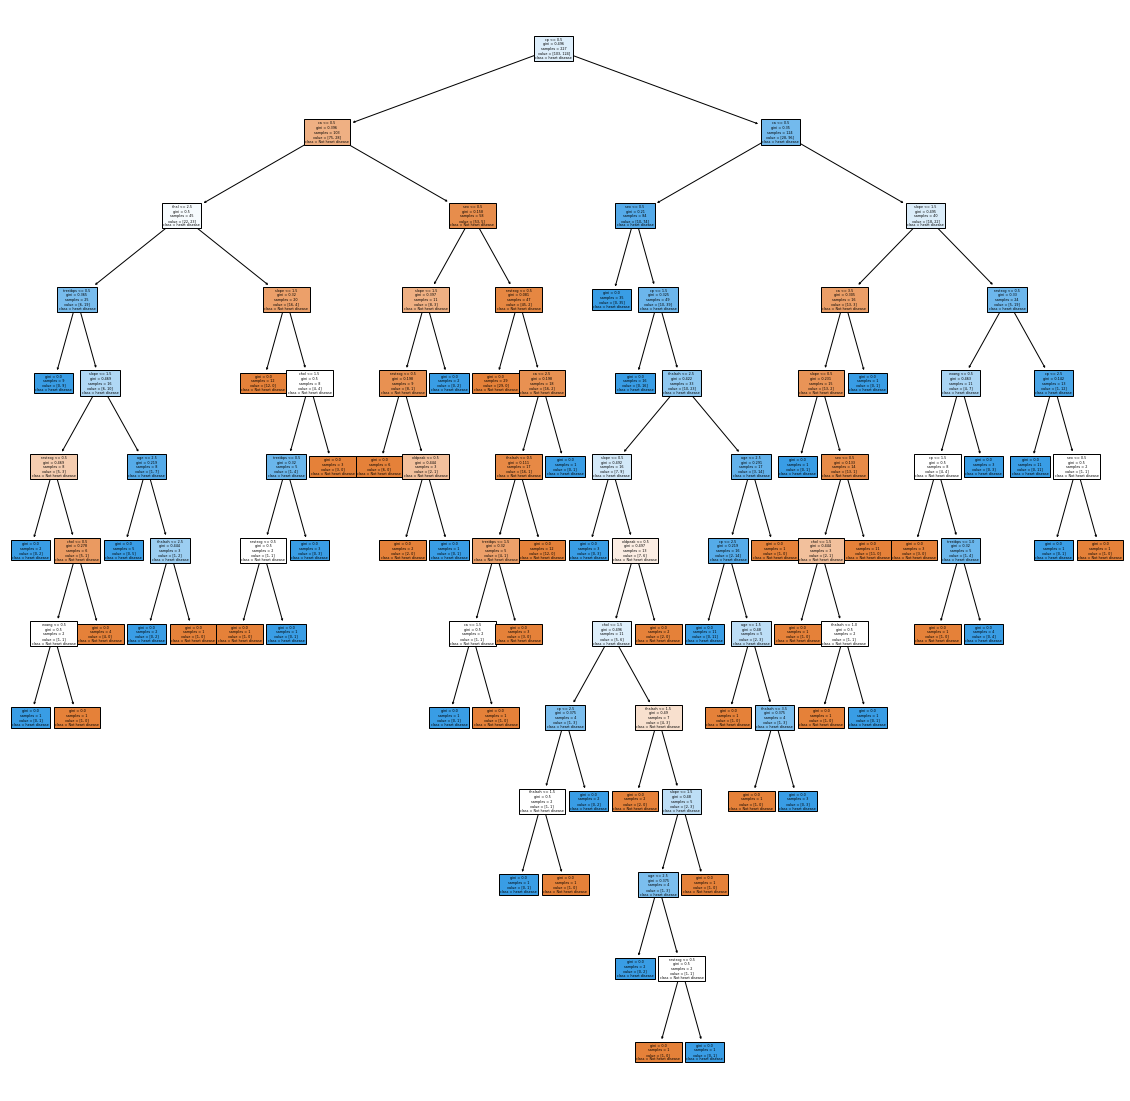

The depth is =  12


In [55]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()
print('The depth is = ',clf.get_depth())

In [56]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 100.0
Test score 76.31578947368422
Train Confusion matrix


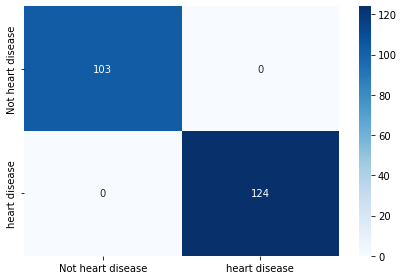

Test Confusion matrix


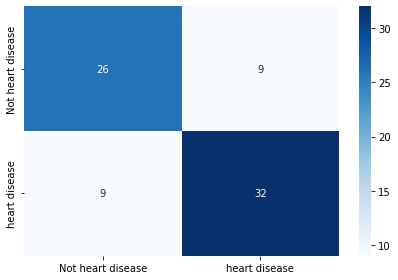

In [57]:
print(f'Train score {accuracy_score(y_train_pred,y_train)*100}')
print(f'Test score {accuracy_score(y_test_pred,y_test)*100}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

We can see that in our train data we have 100% accuracy (100 % precison and recall).
But in test data model is diffrent.
Over model is clearly overfitting.
We will avoid overfitting by applying pre-pruning and post-pruning .

#    ************************** PRE-PRUNING ***********************************

As of now we will control these parameters

max_depth: maximum depth of decision tree
min_sample_split: The minimum number of samples required to split an internal node:
min_samples_leaf: The minimum number of samples required to be at a leaf node.

In [58]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier(random_state = 0)
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.9295154185022027
Test score 0.8157894736842105
Train Confusion matrix


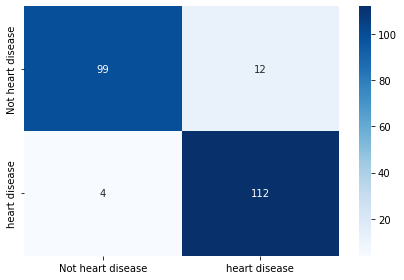

Test Confusion matrix


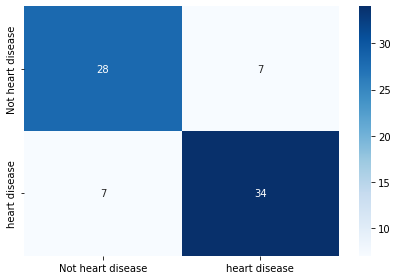

In [59]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

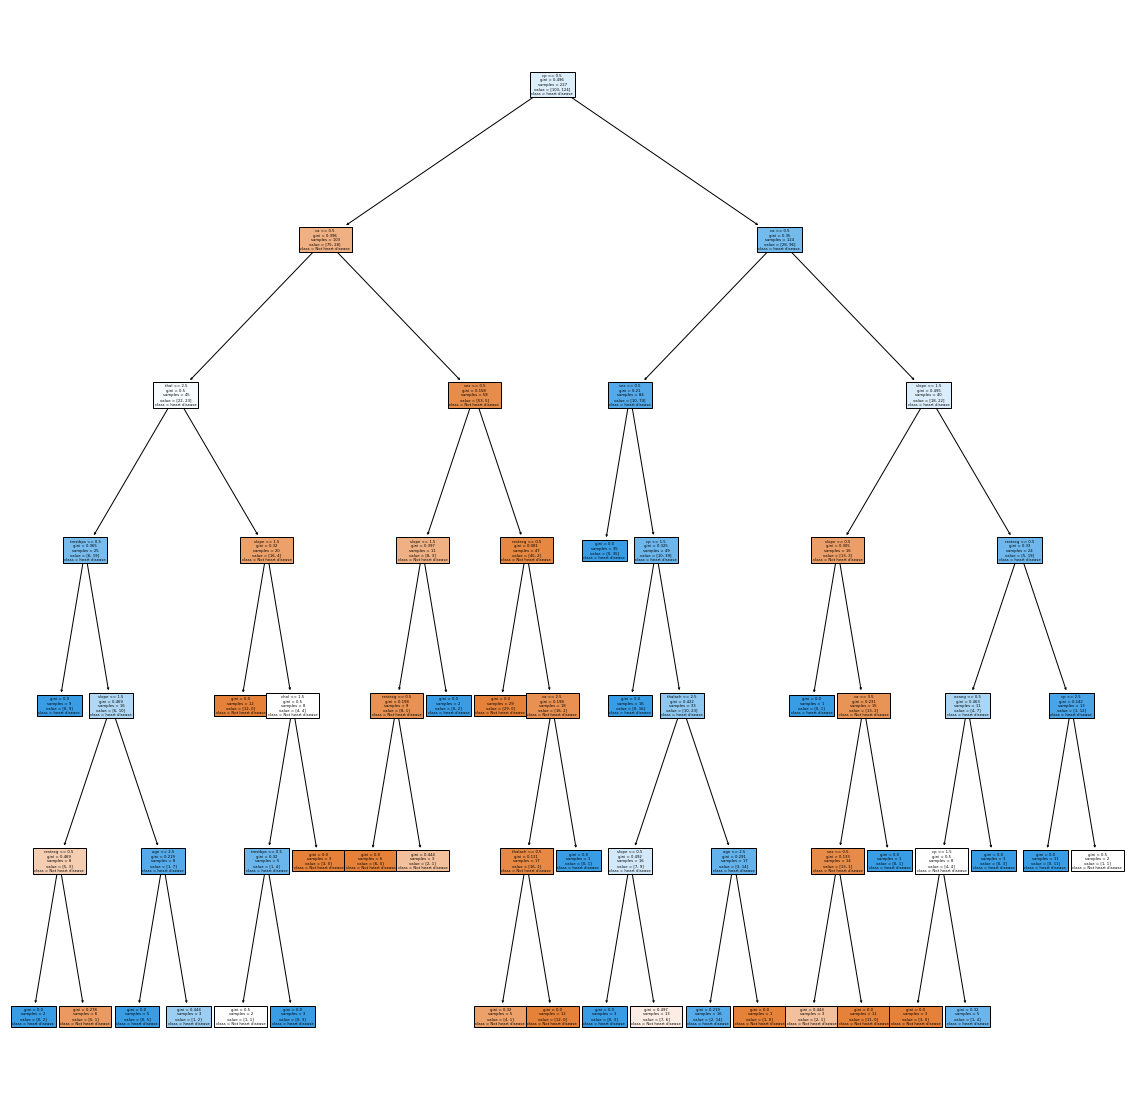

The depth is =  6


In [60]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()
print('The depth is = ',model.get_depth())

We can see that tree is pruned and there is improvement in test accuracy.But still there is still scope of improvement.

#    ************************** POST-PRUNING ***********************************

In [61]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00272708 0.0027641  0.00330396 0.00330396 0.00352423
 0.00360433 0.00367107 0.00385463 0.00391581 0.00406642 0.0042895
 0.00443609 0.0051395  0.0058412  0.00664726 0.00668559 0.00777614
 0.00810496 0.00837494 0.01057269 0.02851129 0.03069995 0.04030784
 0.12509734]


In [62]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [ ]:
We will remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.

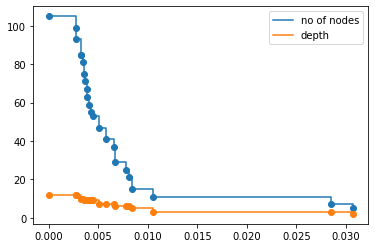

In [64]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

after result, observation: As alpha increases no of nodes and depth decreases.

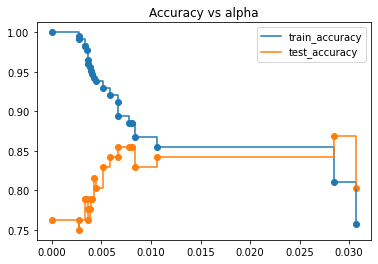

In [65]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [ ]:
so we can choose alpha = 0.020

Train score 85.46255506607929
Test score 84.21052631578947
Train Confusion matrix


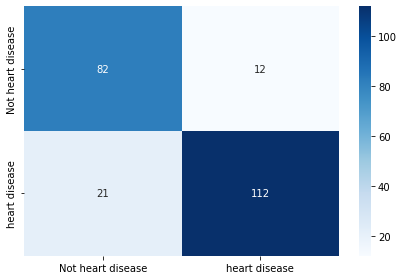

Test Confusion matrix


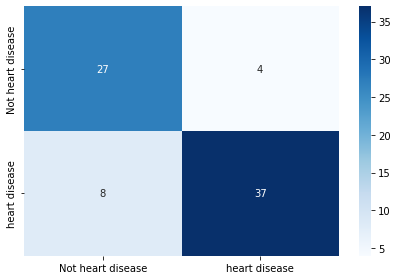

In [66]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)*100}')
print(f'Test score {accuracy_score(y_test_pred,y_test)*100}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

We can see that now our model is not overfiting and performance on test data have improved

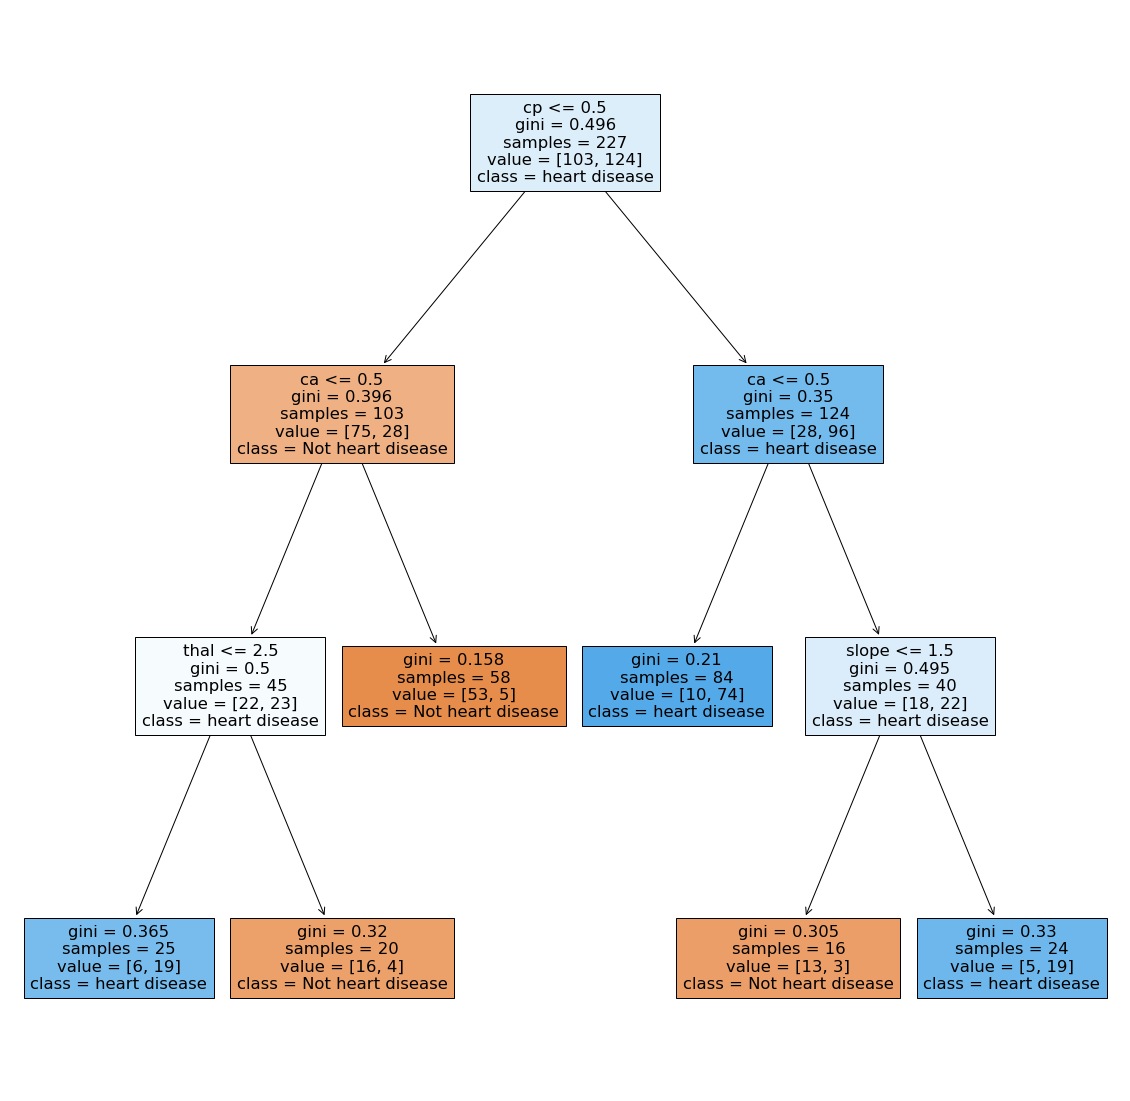

The depth is =  3


In [67]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()
print('The depth is = ',clf_.get_depth())

We can see that the size of decision tree significantly got reduced. Also postpruning is much efficient than prepruning.
also there is improvement in test accuracy.

In [68]:
print(clf_.predict([[15,1,1,300,230,0,0,209,0,1,2,0,2]]))

[1]


#                           Pre-pruning OR Post-pruning ?

At first we will see what deffrences between them , what we choose , why ?

Post Pruning(Backward Pruning): 
 
- This technique is used after construction of decision tree 
- Full tree is generated and then the non-significant branches are pruned/removed.  
- Cross validation is performed at every step to check whether addition of the new branch leads to increase in accuracy, If not the branch is converted to leaf node. 
- This technique is used when decision tree will have very large depth and will show overfitting of model. 
- it has to evaluate very large subset of trees "overhead for whole tree".   
 
 
Pre Pruning(Forward Pruning)( Early stopping): 
 
- This technique is used before construction of decision tree. 
- This approach stops the non-significant branches from generating It terminates the generation of new branch based on the given condition. 
- faster than post especially in larger (features or values) dataset . 
- it is greedy and may ignore splits that have subsequently important splits"may (underfitting)reduce it too much". 

As a result Post-pruning is more efficient than pre-pruning in our data, depend on some cretiria :

- Depth: The results were different every run, so we applied the average for 10th times  
  
Depth before pre-pruning :10.7 
Depth after pre-pruning :4 
  
Depth before post-pruning: 10.2 
Depth after post-pruning: 2.9 

By observing the average depth, we can see that the post pruning prune levels more than pre pruning. 

- Accuracy : the train and test score of the pre and post pruning by taking the average for 10th times 
  
Train = 0.865 for pre 
Test = 0.764 for pre 
  
Train = 0.819 for post 
Test = 0.796 for post 
  
We can clearly see that the train and test score in both pre-pruning and post-pruning are kind of close to each other, and that means the overfitting is solved. 
 
Therefore, in post-pruning the score is so close compared to the score in pre-pruning, that is a good credit for post-pruning since the test data is small compared to the train data but we can see that the accuracy in test is so close to the train. 
As a result of the evaluation, we can say that the post-pruning outperforms the pre-pruning considering the computation we did. 